In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Kalman Filtresi
class KalmanFilter:
    def __init__(self, process_variance, measurement_variance, estimate_variance=1.0):
        self.process_variance = process_variance
        self.measurement_variance = measurement_variance
        self.estimate_variance = estimate_variance
        self.estimate = 0.0
        self.error_covariance = 1.0

    def update(self, measurement):
        kalman_gain = self.error_covariance / (self.error_covariance + self.measurement_variance)
        self.estimate += kalman_gain * (measurement - self.estimate)
        self.error_covariance = (1 - kalman_gain) * self.error_covariance + self.process_variance
        return self.estimate

In [3]:
# Sahte Ölçüm Verileri Oluşturmaya Yarayan Fonksiyon
def mockMeasurementGenerator(numberOfMockData, noise_level = 0.5, real_distance = 0, random_seed = None):
    np.random.seed(random_seed)
    return np.random.normal(real_distance, noise_level, numberOfMockData)
    

In [4]:
# Sahte StereoVision Mesafe Tahmini Verisi Oluşturulması
mockStereoVisionDataLength = 10000
num_measurements = 1
stereoVisionStd = 0.8
real_distance = 15

stereoVisionMeasurements = mockMeasurementGenerator(mockStereoVisionDataLength, stereoVisionStd, real_distance)

In [5]:
# Sahte Radar Mesafe Verisi Oluşturulması
num_positions = 10000
radarStd = 0.2
real_distance = 15

radarMeasurements = mockMeasurementGenerator(num_positions, radarStd, real_distance)

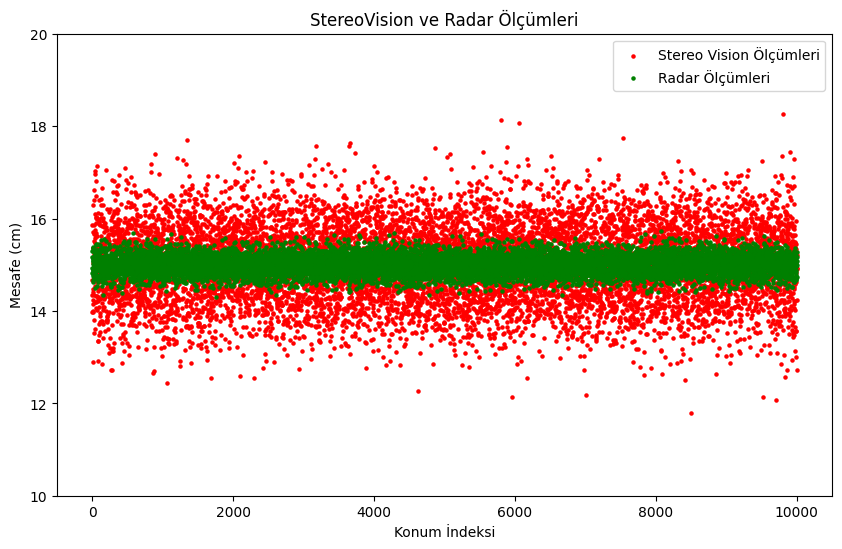

In [6]:
# Ham StereoVision ve Ham Radar Ölçümlerinin Grafik Üzerinde Gösterimi
positions = np.arange(1, num_positions + 1)

plt.figure(figsize=(10, 6))
plt.scatter(positions, stereoVisionMeasurements, label='Stereo Vision Ölçümleri', color = "red", s = 5)
plt.scatter(positions, radarMeasurements, label='Radar Ölçümleri', color = "green", s = 5)
plt.xlabel('Konum İndeksi')
plt.ylabel('Mesafe (cm)')
plt.ylim(10, 20)
plt.legend()
plt.title('StereoVision ve Radar Ölçümleri')
plt.show()

In [7]:
# Kalman Filtresi StereoVision Verisine Uygulanması
kf = KalmanFilter(process_variance=1e-5, measurement_variance=stereoVisionStd**2)

kalman_stereoVision_estimates = []
for measurement in stereoVisionMeasurements:
    kf_estimates = kf.update(measurement)
    kalman_stereoVision_estimates.append(np.mean(kf_estimates))

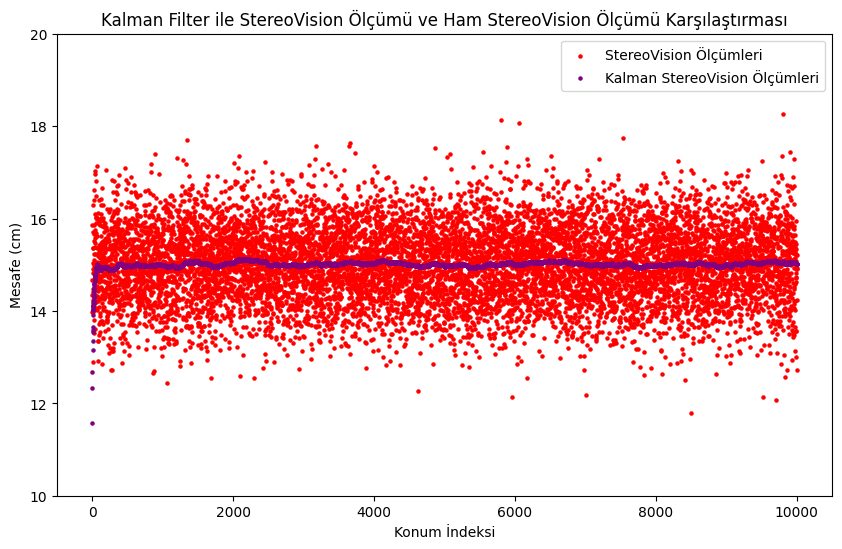

In [8]:
# Kalman Filter Uygulanan StereoVision ve Ham StereoVision Ölçümlerinin Grafik Üzerinde Gösterimi
positions = np.arange(1, num_positions + 1)

plt.figure(figsize=(10, 6))
plt.scatter(positions, stereoVisionMeasurements, label='StereoVision Ölçümleri', color = "red", s = 5)
plt.scatter(positions, kalman_stereoVision_estimates, label='Kalman StereoVision Ölçümleri', color = "purple", s = 5)
plt.xlabel('Konum İndeksi')
plt.ylabel('Mesafe (cm)')
plt.ylim(10, 20)
plt.legend()
plt.title('Kalman Filter ile StereoVision Ölçümü ve Ham StereoVision Ölçümü Karşılaştırması')
plt.show()

In [9]:
# Kalman Filtresi Radar Verisine Uygulanması
kf = KalmanFilter(process_variance=1e-5, measurement_variance=radarStd**2)

kalman_radar_estimates = []
for measurement in radarMeasurements:
    kf_estimates = kf.update(measurement)
    kalman_radar_estimates.append(np.mean(kf_estimates))

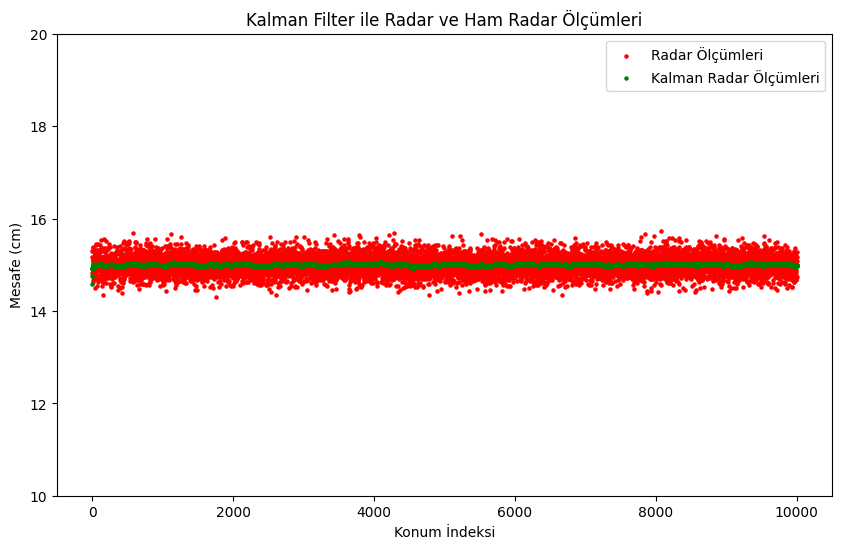

In [10]:
# Kalman Filter Uygulanan StereoVision ve Ham StereoVision Ölçümlerinin Grafik Üzerinde Gösterimi
positions = np.arange(1, num_positions + 1)

plt.figure(figsize=(10, 6))
plt.scatter(positions, radarMeasurements, label='Radar Ölçümleri', color = "red", s = 5)
plt.scatter(positions, kalman_radar_estimates, label='Kalman Radar Ölçümleri', color = "green", s = 5)
plt.xlabel('Konum İndeksi')
plt.ylabel('Mesafe (cm)')
plt.ylim(10, 20)
plt.legend()
plt.title('Kalman Filter ile Radar ve Ham Radar Ölçümleri')
plt.show()

In [11]:
# İki Sensörden Gelen Verilerin Ortalama Alınarak Füzyonlanması
fusedMeasurements = []
for i, j in zip(stereoVisionMeasurements, radarMeasurements):
    meanFuser = (i + j)/2
    fusedMeasurements.append(meanFuser)

combined_variance = (0.5 * stereoVisionStd**2) + (0.5 * radarStd**2)
kf = KalmanFilter(process_variance=1e-5, measurement_variance=combined_variance)

kalman_fused_estimates = []
for measurement in fusedMeasurements:
    kf_estimates = kf.update(measurement)
    kalman_fused_estimates.append(np.mean(kf_estimates))

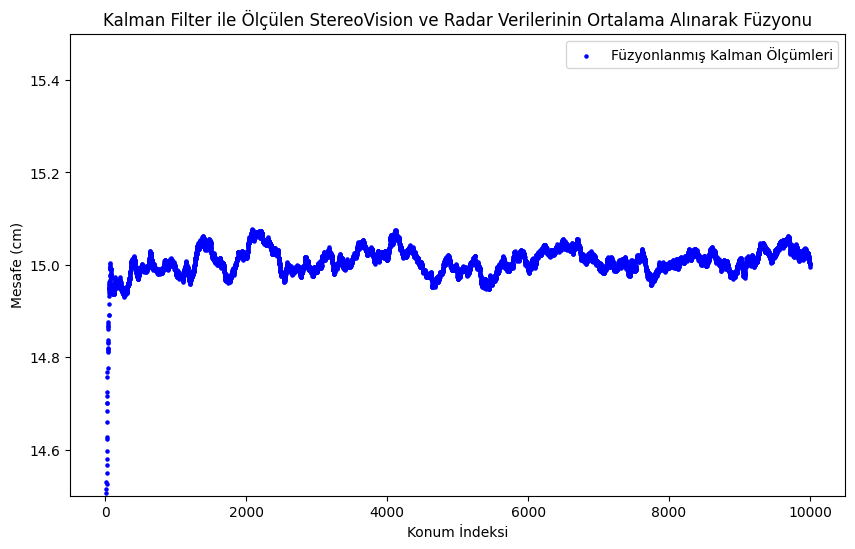

In [12]:
# İki Sensörden Gelen Verilerin Ortalama Alınarak Füzyonlanmasının ve Kalman Filtresi Uygulanmasının Grafik Üzerinde Gösterimi
positions = np.arange(1, num_positions + 1)

plt.figure(figsize=(10, 6))
plt.scatter(positions, kalman_fused_estimates, label='Füzyonlanmış Kalman Ölçümleri', color = "blue", s = 5)
plt.xlabel('Konum İndeksi')
plt.ylabel('Mesafe (cm)')
plt.ylim(14.50, 15.50)
plt.legend()
plt.title('Kalman Filter ile Ölçülen StereoVision ve Radar Verilerinin Ortalama Alınarak Füzyonu')
plt.show()

In [13]:
# İki Sensörden Gelen Verilerin Ağırlıklı Ortalama Alınarak Füzyonlanması
fusedWithWeightedAverageMeasurements = []
for i, j in zip(stereoVisionMeasurements, radarMeasurements):
    meanFuser = ((i * 0.3) + (j * 0.7))
    fusedWithWeightedAverageMeasurements.append(meanFuser)
    
combined_variance = (0.3 * stereoVisionStd**2) + (0.7 * radarStd**2)
kf = KalmanFilter(process_variance=1e-5, measurement_variance=combined_variance)

kalman_Weightedfused_estimates = []
for measurement in fusedWithWeightedAverageMeasurements:
    kf_estimates = kf.update(measurement)
    kalman_Weightedfused_estimates.append(np.mean(kf_estimates))

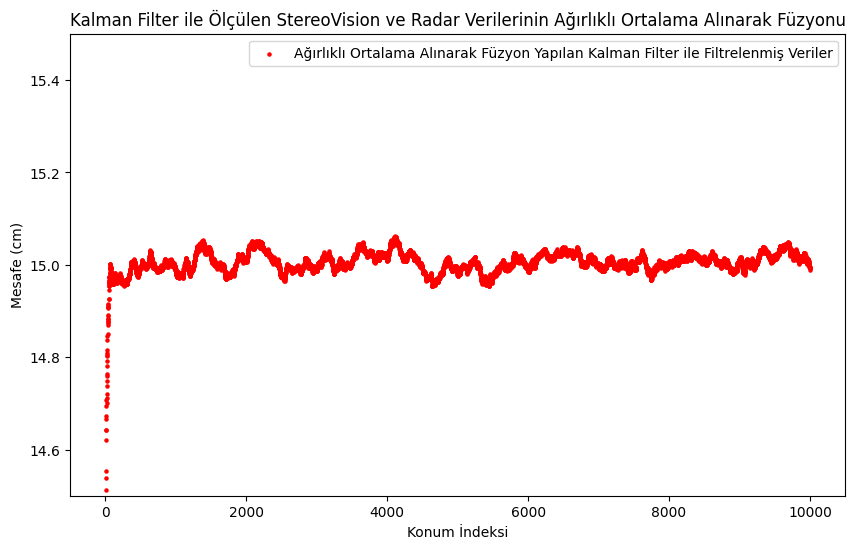

In [14]:
# İki Sensörden Gelen Verilerin Ağırlıklı Ortalama Alınarak Füzyonlanmasının ve Kalman Filtresi Uygulanmasının Grafik Üzerinde Gösterimi
positions = np.arange(1, num_positions + 1)

plt.figure(figsize=(10, 6))
plt.scatter(positions, kalman_Weightedfused_estimates, label='Ağırlıklı Ortalama Alınarak Füzyon Yapılan Kalman Filter ile Filtrelenmiş Veriler', color = "red", s = 5)
plt.xlabel('Konum İndeksi')
plt.ylabel('Mesafe (cm)')
plt.ylim(14.50, 15.50)
plt.legend()
plt.title('Kalman Filter ile Ölçülen StereoVision ve Radar Verilerinin Ağırlıklı Ortalama Alınarak Füzyonu')
plt.show()

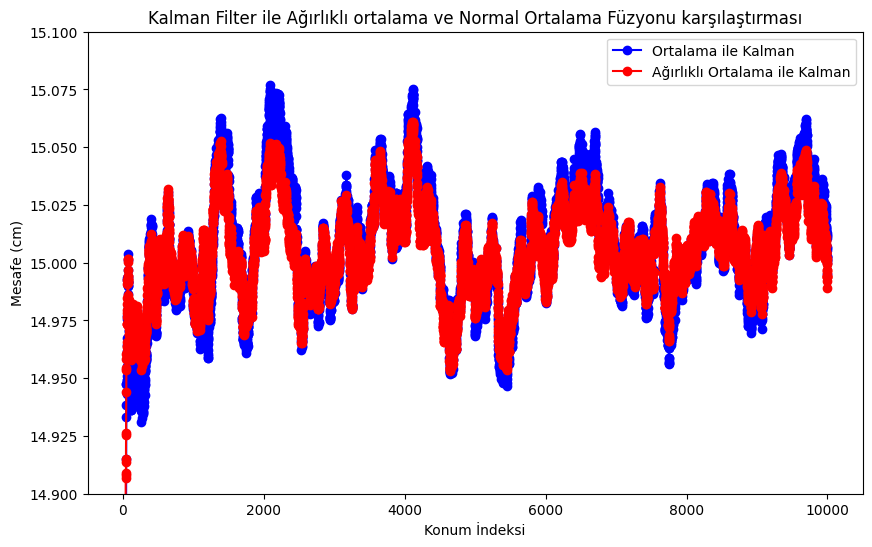

In [15]:
# İki Sensörden Gelen Verilerin Ortalama ve Ağırlıklı Ortalama Alınarak Füzyonlanmasının ve Kalman Filtresi Uygulanmasının Grafik Üzerinde Karşılaştırılması
positions = np.arange(1, num_positions + 1)

plt.figure(figsize=(10, 6))
plt.plot(positions, kalman_fused_estimates, 'o-', label='Ortalama ile Kalman', color = "blue")
plt.plot(positions, kalman_Weightedfused_estimates, 'o-', label='Ağırlıklı Ortalama ile Kalman', color = "red")
plt.xlabel('Konum İndeksi')
plt.ylabel('Mesafe (cm)')
plt.ylim(14.90, 15.10)
plt.legend()
plt.title('Kalman Filter ile Ağırlıklı ortalama ve Normal Ortalama Füzyonu karşılaştırması')
plt.show()